In [2]:
#-------load the prior config file
from autoconf import conf
import os

current_dir = os.getcwd()
dataset_name = "sie_sis_sersic"
dataset_path = f'{current_dir}/dataset/{dataset_name}'
config_path = f'{current_dir}/config'
output_path = f'{current_dir}/output'
print(dataset_path,"\n", config_path,"\n", output_path)
conf.instance.push(
    new_path=config_path, 
    output_path=output_path,
)

/home/cao/data_disk/autolens_xycao/potential_correction_for_sam/demo/dataset/sie_sis_sersic 
 /home/cao/data_disk/autolens_xycao/potential_correction_for_sam/demo/config 
 /home/cao/data_disk/autolens_xycao/potential_correction_for_sam/demo/output


2023-02-07 17:51:10,857 - autoarray.dataset.imaging - INFO - IMAGING - Data masked, contains a total of 7860 image-pixels


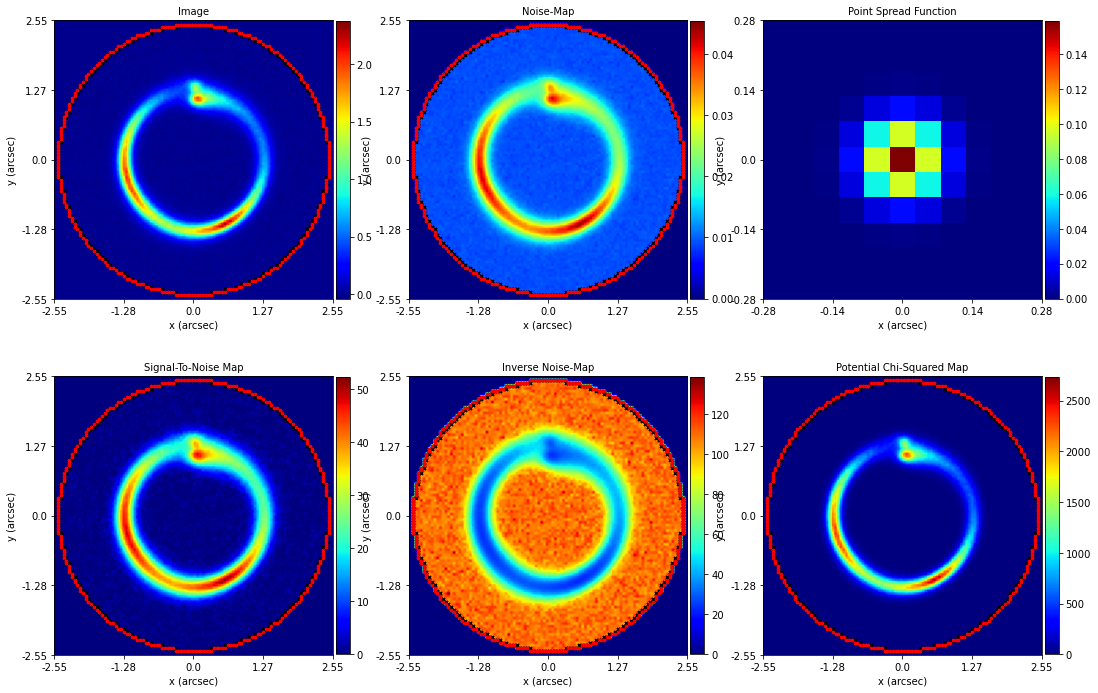

In [3]:
import autolens as al
import autofit as af
import autolens.plot as aplt
#--------------load the data
imaging = al.Imaging.from_fits(
    image_path=os.path.join(dataset_path, "image.fits"),
    psf_path=os.path.join(dataset_path, "psf.fits"),
    noise_map_path=os.path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.05,
)
mask_data = al.Mask2D.circular(
    shape_native=imaging.shape_native,
    radius=2.5,
    pixel_scales=imaging.pixel_scales,
)
imaging = imaging.apply_mask(mask=mask_data)
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()

In [4]:
# do a so-called macro model (i.e, there is no subhaloes included in the mass model) pair with the parametric source model
analysis = al.AnalysisImaging(dataset=imaging) #Init an imaging analysis object
z_l = 0.5 #lens redshift. the specific value is irrelevant if we only care about the angular unit
z_s = 1.0 #source redshift

#---------------step-1: fit lens light only;
mass = af.Model(al.mp.EllIsothermal)
mass.centre_0 = 0.0 #I fix the mass center for better sampling speed
mass.centre_1 = 0.0
mass.einstein_radius = af.UniformPrior(lower_limit=0.2, upper_limit=2.5)

model_1 = af.Collection(
    galaxies=af.Collection(
        lens=af.Model(
            al.Galaxy,
            redshift=z_l,
            mass=mass,
        ),
        source=af.Model(
            al.Galaxy,
            redshift=z_s,
            bulge=af.Model(al.lp.EllExponential),
        ),
    )
)

search_1 = af.DynestyStatic(
    path_prefix=None,
    name='sie_mass_par_src',
    unique_tag=dataset_name,
    number_of_cores=1,
    session=None,
    nlive=150,
    sample='rwalk',
    walks=10,
)

result_1 = search_1.fit(model=model_1, analysis=analysis, info=None)

2023-02-07 17:53:02,903 - autofit.non_linear.abstract_search - INFO - Creating search
2023-02-07 17:53:02,904 - sie_mass_par_src - INFO - Starting search
2023-02-07 17:53:03,421 - autolens.imaging.model.analysis - INFO - PRELOADS - Setting up preloads, may take a few minutes for fits using an inversion.
2023-02-07 17:53:03,715 - sie_mass_par_src - INFO - Saving path info
2023-02-07 17:53:03,763 - sie_mass_par_src - INFO - Not complete. Starting non-linear search.
2023-02-07 17:53:03,763 - sie_mass_par_src - INFO - number_of_cores == 1...
2023-02-07 17:53:03,764 - sie_mass_par_src - INFO - ...not using pool
2023-02-07 17:53:03,764 - autofit.non_linear.initializer - INFO - Generating initial samples of model, which are subject to prior limits and other constraints.
2023-02-07 17:53:04,785 - sie_mass_par_src - INFO - No Dynesty samples found, beginning new non-linear search. 


511it [00:29, 17.07it/s, +150 | bound: 3 | nc: 1 | ncall: 5156 | eff(%): 12.820 | loglstar:   -inf < -425503.230 <    inf | logz: -425512.335 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 17:53:34,822 - sie_mass_par_src - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).


935it [00:31, 30.00it/s, +150 | bound: 25 | nc: 1 | ncall: 10166 | eff(%): 10.673 | loglstar:   -inf < -425503.230 <    inf | logz: -425515.153 +/-    nan | dlogz:  1.099 >  0.159]

2023-02-07 17:54:18,881 - sie_mass_par_src - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).



1231it [00:30, 40.21it/s, +150 | bound: 45 | nc: 1 | ncall: 15171 | eff(%):  9.103 | loglstar:   -inf < -339491.176 <    inf | logz: -339505.066 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 17:55:02,583 - sie_mass_par_src - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).


1497it [00:30, 48.56it/s, +150 | bound: 62 | nc: 1 | ncall: 20178 | eff(%):  8.162 | loglstar:   -inf < -313333.232 <    inf | logz: -313348.889 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 17:55:46,701 - sie_mass_par_src - INFO - 20000 Iterations: Performing update (Visualization, outputting samples, etc.).


1946it [00:31, 61.27it/s, +150 | bound: 84 | nc: 1 | ncall: 25188 | eff(%):  8.321 | loglstar:   -inf < -200210.276 <    inf | logz: -200228.917 +/-    nan | dlogz:  1.099 >  0.159] 


2023-02-07 17:56:31,800 - sie_mass_par_src - INFO - 25000 Iterations: Performing update (Visualization, outputting samples, etc.).


2400it [00:31, 75.15it/s, +150 | bound: 106 | nc: 1 | ncall: 30195 | eff(%):  8.445 | loglstar:   -inf < -75456.667 <    inf | logz: -75478.324 +/-    nan | dlogz:  1.099 >  0.159]  


2023-02-07 17:57:17,682 - sie_mass_par_src - INFO - 30000 Iterations: Performing update (Visualization, outputting samples, etc.).


2851it [00:32, 88.52it/s, +150 | bound: 128 | nc: 1 | ncall: 35205 | eff(%):  8.524 | loglstar:   -inf < -55048.027 <    inf | logz: -55072.681 +/-    nan | dlogz:  1.099 >  0.159]   


2023-02-07 17:58:03,827 - sie_mass_par_src - INFO - 35000 Iterations: Performing update (Visualization, outputting samples, etc.).


3302it [00:32, 101.40it/s, +150 | bound: 149 | nc: 1 | ncall: 40206 | eff(%):  8.586 | loglstar:   -inf < -34157.873 <    inf | logz: -34185.523 +/-    nan | dlogz:  1.099 >  0.159]  


2023-02-07 17:58:50,826 - sie_mass_par_src - INFO - 40000 Iterations: Performing update (Visualization, outputting samples, etc.).


3763it [00:32, 116.82it/s, +150 | bound: 171 | nc: 1 | ncall: 45209 | eff(%):  8.655 | loglstar:   -inf < -24787.481 <    inf | logz: -24818.195 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 17:59:37,270 - sie_mass_par_src - INFO - 45000 Iterations: Performing update (Visualization, outputting samples, etc.).


4214it [00:32, 129.83it/s, +150 | bound: 193 | nc: 1 | ncall: 50210 | eff(%):  8.691 | loglstar:   -inf < -16673.388 <    inf | logz: -16707.098 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 18:00:24,467 - sie_mass_par_src - INFO - 50000 Iterations: Performing update (Visualization, outputting samples, etc.).


4678it [00:32, 144.33it/s, +150 | bound: 214 | nc: 1 | ncall: 55217 | eff(%):  8.744 | loglstar:   -inf < -14135.772 <    inf | logz: -14172.566 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 18:01:11,519 - sie_mass_par_src - INFO - 55000 Iterations: Performing update (Visualization, outputting samples, etc.).


5131it [00:31, 163.27it/s, +150 | bound: 236 | nc: 1 | ncall: 60218 | eff(%):  8.770 | loglstar:   -inf < -12924.742 <    inf | logz: -12964.546 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 18:01:58,013 - sie_mass_par_src - INFO - 60000 Iterations: Performing update (Visualization, outputting samples, etc.).


5597it [00:31, 176.73it/s, +150 | bound: 258 | nc: 1 | ncall: 65224 | eff(%):  8.811 | loglstar:   -inf < -12245.254 <    inf | logz: -12288.154 +/-    nan | dlogz:  1.099 >  0.159]


2023-02-07 18:02:44,512 - sie_mass_par_src - INFO - 65000 Iterations: Performing update (Visualization, outputting samples, etc.).


6047it [00:31, 191.04it/s, +150 | bound: 279 | nc: 1 | ncall: 70227 | eff(%):  8.824 | loglstar:   -inf < -12026.018 <    inf | logz: -12071.907 +/-    nan | dlogz:  1.098 >  0.159]


2023-02-07 18:03:31,998 - sie_mass_par_src - INFO - 70000 Iterations: Performing update (Visualization, outputting samples, etc.).


6503it [00:32, 200.48it/s, +150 | bound: 301 | nc: 1 | ncall: 75232 | eff(%):  8.843 | loglstar:   -inf < -11777.968 <    inf | logz: -11826.888 +/-    nan | dlogz:  1.098 >  0.159]


2023-02-07 18:04:19,844 - sie_mass_par_src - INFO - 75000 Iterations: Performing update (Visualization, outputting samples, etc.).


6963it [00:32, 214.62it/s, +150 | bound: 323 | nc: 1 | ncall: 80233 | eff(%):  8.865 | loglstar:   -inf < -11716.739 <    inf | logz: -11768.715 +/-    nan | dlogz:  1.098 >  0.159]


2023-02-07 18:05:08,664 - sie_mass_par_src - INFO - 80000 Iterations: Performing update (Visualization, outputting samples, etc.).


7417it [00:31, 232.11it/s, +150 | bound: 345 | nc: 1 | ncall: 85254 | eff(%):  8.876 | loglstar:   -inf < -11692.604 <    inf | logz: -11747.593 +/-    nan | dlogz:  1.096 >  0.159]


2023-02-07 18:05:56,452 - sie_mass_par_src - INFO - 85000 Iterations: Performing update (Visualization, outputting samples, etc.).


7866it [00:31, 246.22it/s, +150 | bound: 367 | nc: 1 | ncall: 90256 | eff(%):  8.881 | loglstar:   -inf < -11678.742 <    inf | logz: -11736.249 +/-    nan | dlogz:  0.811 >  0.159]


2023-02-07 18:06:44,787 - sie_mass_par_src - INFO - 90000 Iterations: Performing update (Visualization, outputting samples, etc.).


8311it [00:32, 259.14it/s, +150 | bound: 388 | nc: 1 | ncall: 95275 | eff(%):  8.881 | loglstar:   -inf < -11672.724 <    inf | logz: -11732.961 +/-    nan | dlogz:  0.691 >  0.159]


2023-02-07 18:07:34,490 - sie_mass_par_src - INFO - 95000 Iterations: Performing update (Visualization, outputting samples, etc.).


8749it [00:31, 273.65it/s, +150 | bound: 410 | nc: 1 | ncall: 100283 | eff(%):  8.874 | loglstar:   -inf < -11668.322 <    inf | logz: -11730.086 +/-    nan | dlogz:  0.223 >  0.159]


2023-02-07 18:08:23,267 - sie_mass_par_src - INFO - 100000 Iterations: Performing update (Visualization, outputting samples, etc.).


9197it [00:31, 287.55it/s, +150 | bound: 432 | nc: 1 | ncall: 105287 | eff(%):  8.878 | loglstar:   -inf < -11667.139 <    inf | logz: -11729.902 +/-    nan | dlogz:  0.034 >  0.159]


2023-02-07 18:09:12,423 - sie_mass_par_src - INFO - 105000 Iterations: Performing update (Visualization, outputting samples, etc.).


9647it [00:31, 304.06it/s, +150 | bound: 453 | nc: 1 | ncall: 110289 | eff(%):  8.883 | loglstar:   -inf < -11666.441 <    inf | logz: -11729.861 +/-    nan | dlogz:  0.003 >  0.159]


2023-02-07 18:10:02,541 - sie_mass_par_src - INFO - 110000 Iterations: Performing update (Visualization, outputting samples, etc.).


9820it [00:12, 809.90it/s, +150 | bound: 462 | nc: 1 | ncall: 112179 | eff(%):  8.888 | loglstar:   -inf < -11666.441 <    inf | logz: -11729.859 +/-    nan | dlogz:  0.001 >  0.159]


2023-02-07 18:10:32,138 - sie_mass_par_src - INFO - 115000 Iterations: Performing update (Visualization, outputting samples, etc.).


9820it [00:00, 2904454.22it/s, +150 | bound: 462 | nc: 1 | ncall: 112179 | eff(%):  8.888 | loglstar:   -inf < -11666.441 <    inf | logz: -11729.859 +/-    nan | dlogz:  0.001 >  0.159]


2023-02-07 18:10:50,010 - sie_mass_par_src - INFO - 120000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-02-07 18:11:07,418 - sie_mass_par_src - INFO - 125000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-02-07 18:11:32,494 - sie_mass_par_src - INFO - Removing zip file


In [15]:
#In our current potential-correciton implementation, the mass model are input as a lens potential map, here we output
#the best-fit macro mass model to a such lens potential map
import pickle
try:
    with open(f'{current_dir}/psi2d_macro.pkl','rb') as f:
        psi_2d = pickle.load(f)
except:
    psi_2d = result_1.max_log_likelihood_instance.galaxies.lens.potential_2d_from(imaging.grid).binned.native
    with open(f'{current_dir}/psi2d_macro.pkl','wb') as f:
        pickle.dump(psi_2d, f)

In [5]:
#---------------init a pixlized src model, get the best source regularization strength
pixelization = af.Model(al.pix.DelaunayMagnification)
regularization = af.Model(al.reg.Constant)

model_2 = af.Collection(
    galaxies=af.Collection(
        lens=af.Model(
            al.Galaxy,
            redshift=result_1.instance.galaxies.lens.redshift,
            mass=result_1.instance.galaxies.lens.mass,
        ),
        source=af.Model(
            al.Galaxy,
            redshift=result_1.instance.galaxies.source.redshift,
            pixelization=pixelization,
            regularization=regularization,
        ),
    )
)

search_2 = af.DynestyStatic(
    path_prefix=None,
    name='init_pix_src',
    unique_tag=dataset_name,
    number_of_cores=1,
    session=None,
    nlive=20,
    sample='rwalk',
    walks=5,
)

result_2 = search_2.fit(model=model_2, analysis=analysis, info=None)

2023-02-07 18:12:31,049 - autofit.non_linear.abstract_search - INFO - Creating search
2023-02-07 18:12:31,050 - init_pix_src - INFO - Starting search
2023-02-07 18:12:31,582 - autolens.imaging.model.analysis - INFO - PRELOADS - Setting up preloads, may take a few minutes for fits using an inversion.
2023-02-07 18:12:31,587 - autoarray.dataset.imaging - INFO - IMAGING - Computing W-Tilde... May take a moment.
2023-02-07 18:12:32,803 - autoarray.preloads - INFO - PRELOADS - Computing W-Tilde... May take a moment.
2023-02-07 18:12:33,388 - autoarray.preloads - INFO - PRELOADS - W-Tilde preloaded for this model-fit.
2023-02-07 18:12:33,393 - autolens.lens.model.preloads - INFO - PRELOADS - Blurred image (e.g. the image of all light profiles) is preloaded for this model-fit.
2023-02-07 18:12:33,417 - autolens.lens.model.preloads - INFO - PRELOADS - Traced grid of planes (for inversion) preloaded for this model-fit.
2023-02-07 18:12:33,421 - autoarray.preloads - INFO - PRELOADS - Relocated g

327it [09:26,  1.73s/it, +20 | bound: 106 | nc: 1 | ncall: 3140 | eff(%): 11.051 | loglstar:   -inf < 8684.993 <    inf | logz: 8672.599 +/-  1.077 | dlogz:  0.001 >  0.029]

2023-02-07 18:22:03,560 - init_pix_src - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).



327it [00:00, 463513.82it/s, +20 | bound: 106 | nc: 1 | ncall: 3140 | eff(%): 11.051 | loglstar:   -inf < 8684.993 <    inf | logz: 8672.599 +/-  1.077 | dlogz:  0.001 >  0.029]

2023-02-07 18:22:43,621 - init_pix_src - INFO - 10000 Iterations: Performing update (Visualization, outputting samples, etc.).


2023-02-07 18:23:23,392 - init_pix_src - INFO - 15000 Iterations: Performing update (Visualization, outputting samples, etc.).
2023-02-07 18:24:05,542 - init_pix_src - INFO - Removing zip file


In [11]:
#here is the initial parameter guess for the pixelized source model
print(result_2.max_log_likelihood_instance.galaxies.source.pixelization.shape)
print(result_2.max_log_likelihood_instance.galaxies.source.regularization.coefficient)

(44, 42)
0.4181255803817723


Redshift: 0.5
Mass Profiles:
EllIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.05487679935107253, -0.045300497852498206)
einstein_radius: 1.25555045309194
slope: 2.0
core_radius: 0.0
id: 1
_label: mass0
_is_frozen: False
_frozen_cache: {}
_assertions: []
label: mass1